# ESTATISTICAL ANALYSIS AND MODELING OF MONTHLY RESOLUTION RAINFALL TIME SERIES
The data in this repository describes the historical precipitation of a location in Colombia. It comes from ERA5-Land and consists of monthly records.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
path= "C:/Users/USUARIO/OneDrive - SHI S.A.S/Camilo/ML/Time_Series_Forecasting_v2/raw_data.csv"
data=pd.read_csv(path,delimiter=";")
data.rename(columns={"Pptn1m [mm]": "PP"}, inplace=True)

In [2]:
data.head()

,Year,Month,PP
0,1950,1,265.5
1,1950,2,324.4
2,1950,3,339.4
3,1950,4,534.8
4,1950,5,803.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    876 non-null    int64  
 1   Month   876 non-null    int64  
 2   PP      876 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 20.7 KB


In [4]:
data["Date"]=pd.to_datetime(data[["Year","Month"]].assign(Day=1))
print(data)

     Year  Month     PP       Date
0    1950      1  265.5 1950-01-01
1    1950      2  324.4 1950-02-01
2    1950      3  339.4 1950-03-01
3    1950      4  534.8 1950-04-01
4    1950      5  803.7 1950-05-01
..    ...    ...    ...        ...
871  2022      8  617.9 2022-08-01
872  2022      9  494.9 2022-09-01
873  2022     10  476.4 2022-10-01
874  2022     11  459.9 2022-11-01
875  2022     12  177.9 2022-12-01

[876 rows x 4 columns]


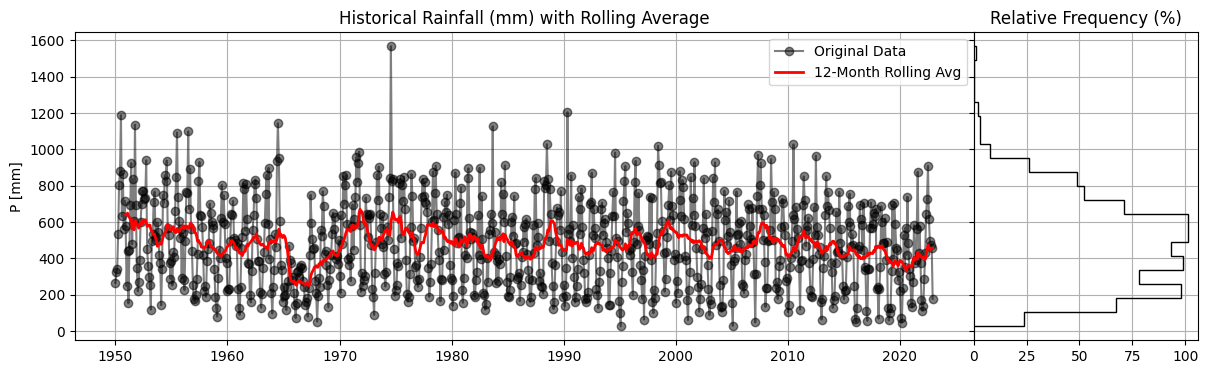

In [156]:
# Calcular la media móvil de 12 meses
data['Rolling_Avg'] = data['PP'].rolling(window=12).mean()

# Crear la figura
fig = plt.figure(figsize=(14.5, 4))
gs = GridSpec(1, 2, width_ratios=[4, 1], wspace=0)  

# Primer subplot: gráfico de líneas
ax1 = fig.add_subplot(gs[0])
ax1.plot(data['Date'], data['PP'], label='Original Data', marker='o',color="black", alpha=0.5)
ax1.plot(data['Date'], data['Rolling_Avg'], label='12-Month Rolling Avg', color='red', linewidth=2)
ax1.set_title('Historical Rainfall (mm) with Rolling Average')
ax1.set_xlabel('')
ax1.set_ylabel('P [mm]')
ax1.legend()
ax1.grid(True)

# Segundo subplot: histograma de la serie de datos
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax2.hist(data['PP'], bins=20, color='black', histtype="step", orientation="horizontal")
ax2.set_title('Relative Frequency (%)')
ax2.set_xlabel('')
ax2.grid(True)

# Sin etiquetas en el eje y del segundo subplot
ax2.tick_params(axis='y', labelleft=False)
# Mostrar la figura
plt.show()


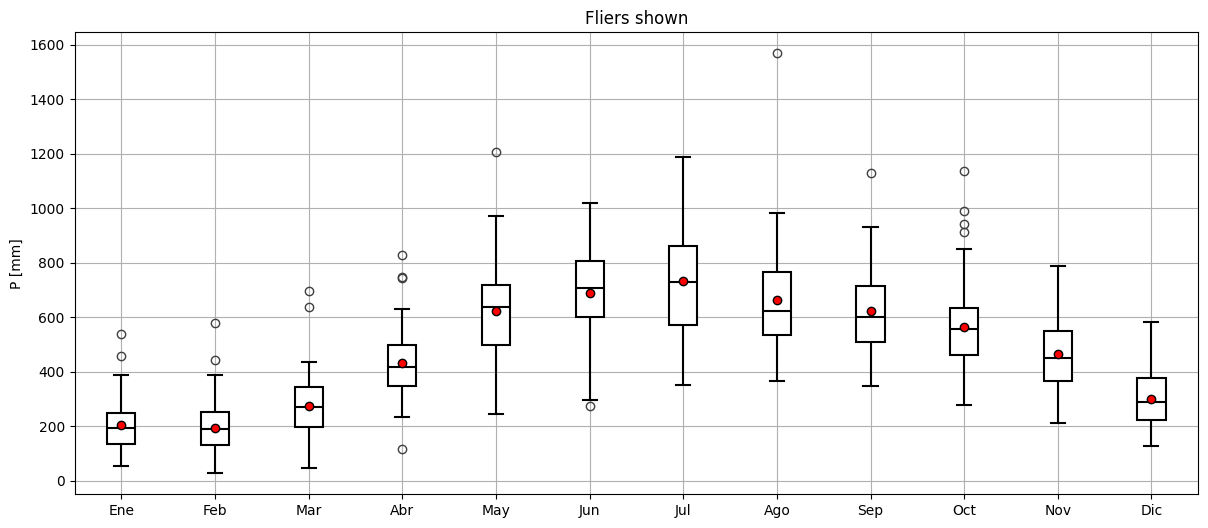

In [157]:
# Agrupar por mes
data['Month'] = data['Date'].dt.month

# BOXPLOT CON FLIERS
plt.figure(figsize=(14.5, 6))
sns.boxplot(x='Month', y='PP', 
            data=data,showfliers=True,
            showmeans=True,
            width=0.3,
            capprops={"color": "black", "linewidth":1.5},
            whiskerprops={"color": "black", "linewidth":1.5},
            meanprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'},
            medianprops={'color': 'black', 'linewidth': 1.5},
            boxprops={"facecolor":"white","edgecolor":"black","linewidth":1.5}
            )
plt.title('Fliers shown')
plt.xlabel('')
plt.ylabel('P [mm]')
plt.xticks(ticks=range(12), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.grid(True)
plt.show()

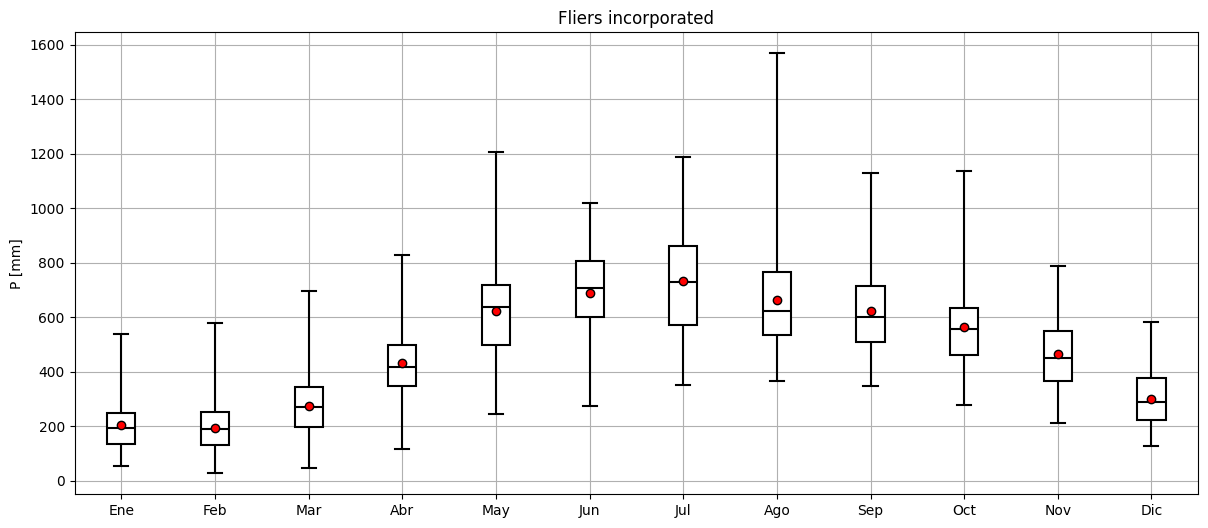

In [158]:
# Agrupar por mes
data['Month'] = data['Date'].dt.month

# BOXPLOT INCORPORADO
plt.figure(figsize=(14.5, 6))
sns.boxplot(x='Month', y='PP', 
            data=data,whis=[0,100],
            showmeans=True,
            width=0.3,
            capprops={"color": "black", "linewidth":1.5},
            whiskerprops={"color": "black", "linewidth":1.5},
            meanprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'},
            medianprops={'color': 'black', 'linewidth': 1.5},
            boxprops={"facecolor":"white","edgecolor":"black","linewidth":1.5}
            )
plt.title('Fliers incorporated')
plt.xlabel('')
plt.ylabel('P [mm]')
plt.xticks(ticks=range(12), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.grid(True)
plt.show()

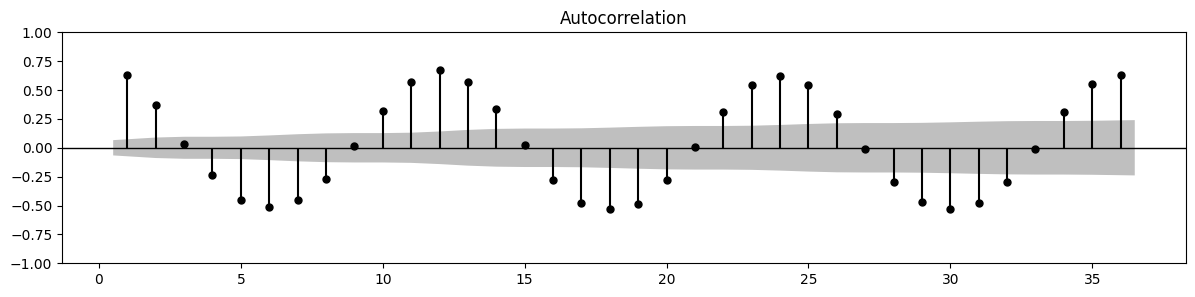

In [154]:
def plot_acf_colors(ax, markercolor="black", linecolor="black", facecolor="black", barcolor="black", linewidth=1):
    """utility function to get some control over colors with  plot_acf()"""
    from statsmodels.graphics.tsaplots import plot_pacf
    from statsmodels.graphics.tsaplots import plot_acf
    from matplotlib.collections import PolyCollection, LineCollection
    for item in ax.collections:
        # change the color of the confidence interval 
        if type(item) == PolyCollection:
            item.set_facecolor(facecolor)
        # change the color of the vertical lines
        if type(item) == LineCollection:
            item.set_color(barcolor)
    # change the color of the markers
    [line.get_label() for line in ax.lines]
    for item in ax.lines:
        item.set_color(markercolor)
    # change the color of the horizontal lines
    ax.lines[0].set_color(linecolor)
    ax.lines[0].set_linewidth(linewidth)
    #ax.lines.remove(ax.lines[0])
    return ax

# custom plot
f, ax = plt.subplots(figsize=(14.5, 3))
plot_acf(data.PP, lags=36, ax=ax,zero=False)
ax = plot_acf_colors(ax)
plt.show()

In [151]:
#FUNCIONES PARA LOS LAGS
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
        color="black"
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

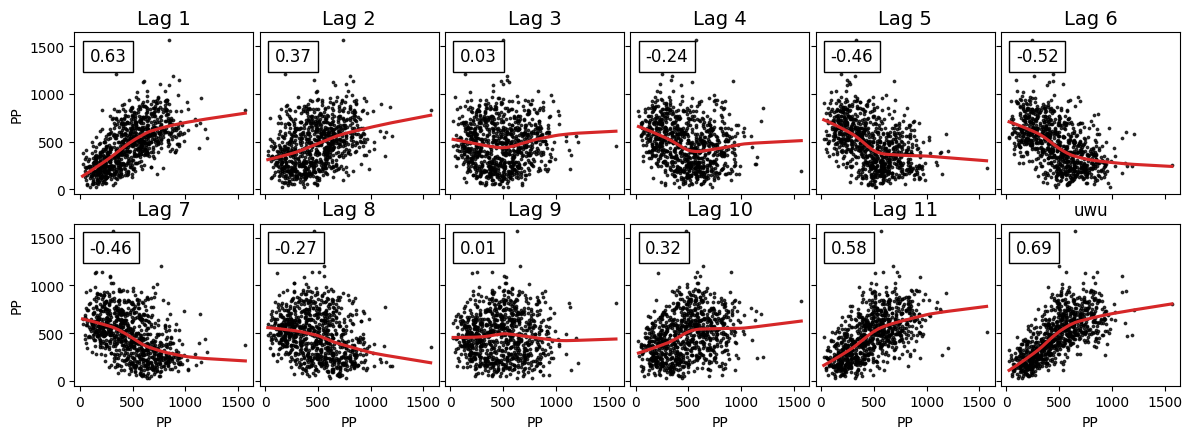

In [153]:
plot_lags(data.PP,lags=12, nrows=2)
plt.show()

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         876 non-null    int64         
 1   Month        876 non-null    int32         
 2   PP           876 non-null    float64       
 3   Date         876 non-null    datetime64[ns]
 4   Rolling_Avg  865 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 30.9 KB


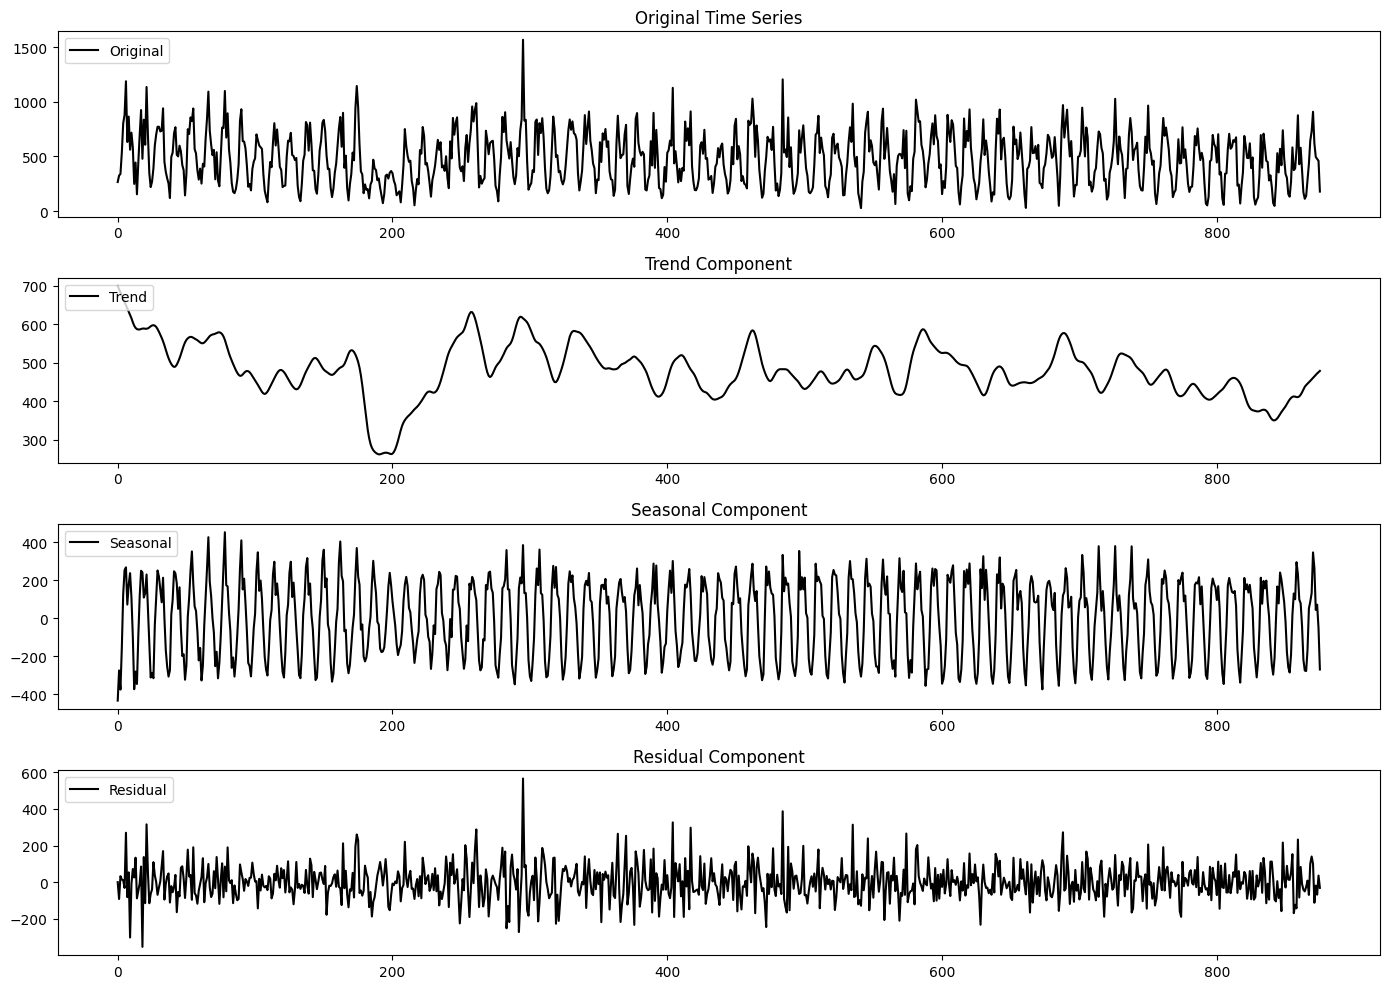

In [174]:
#DECOMP
from statsmodels.tsa.seasonal import STL

data.set_index('Date')

# Perform STL decomposition
seasonal_period = 12  # Adjust this based on the seasonality of your data
stl = STL(data['PP'], period=seasonal_period)
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data['PP'], label='Original',color="black")
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend',color="black")
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal',color="black")
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual',color="black")
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()



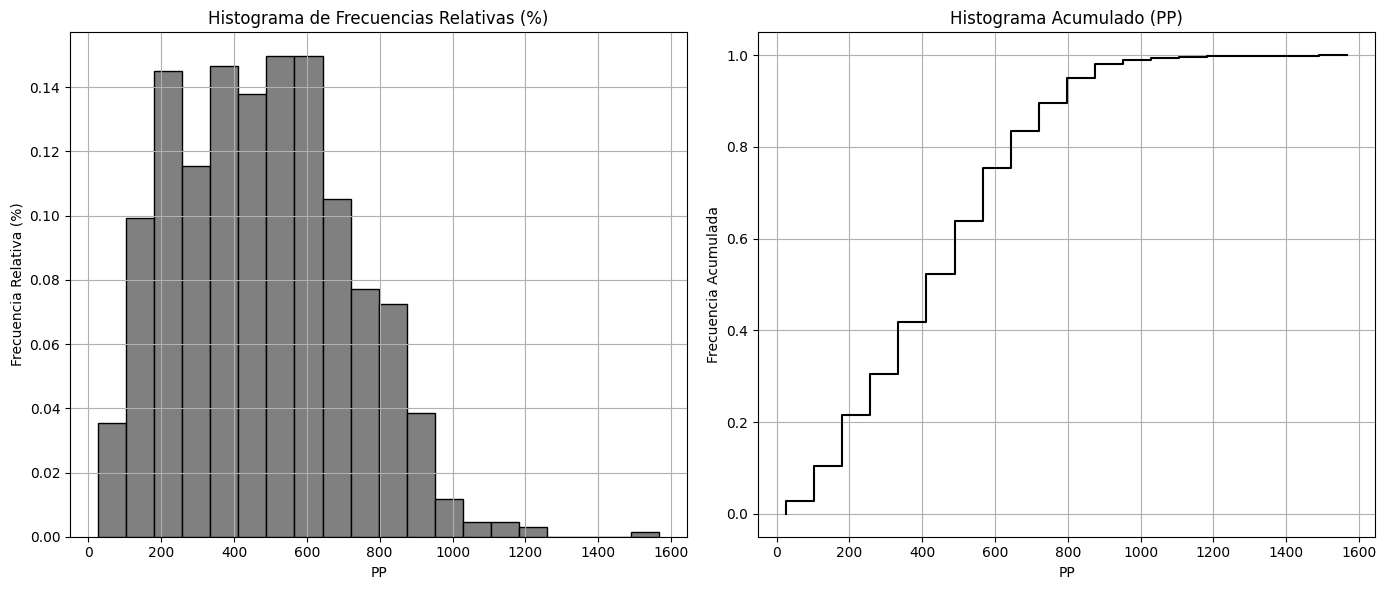

In [210]:
# Calcular histograma y frecuencias relativas
counts, bin_edges = np.histogram(data['PP'], bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calcular histograma y frecuencias relativas
counts, bin_edges = np.histogram(data['PP'], bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Convertir frecuencias relativas a porcentaje
percent_counts = counts * 100

# Calcular frecuencia acumulada y función de probabilidad empírica
cumulative_counts = np.cumsum(counts * np.diff(bin_edges))
empirical_cdf = np.concatenate(([0], cumulative_counts))

# Graficar histograma de frecuencias relativas
plt.figure(figsize=(14, 6))

# Histograma de frecuencias relativas en porcentaje
plt.subplot(1, 2, 1)
plt.bar(bin_centers, percent_counts, 
        width=np.diff(bin_edges),
        color="gray", 
        edgecolor='black', 
        alpha=1
        )
plt.title('Histograma de Frecuencias Relativas (%)')
plt.xlabel('PP')
plt.ylabel('Frecuencia Relativa (%)')
plt.grid(True)
# Histograma acumulado
plt.subplot(1, 2, 2)
plt.step(bin_edges, 
         empirical_cdf,  
         color="black"
         )
plt.title('Histograma Acumulado (PP)')
plt.xlabel('PP')
plt.ylabel('Frecuencia Acumulada')
plt.grid(True)

plt.tight_layout()
plt.show()

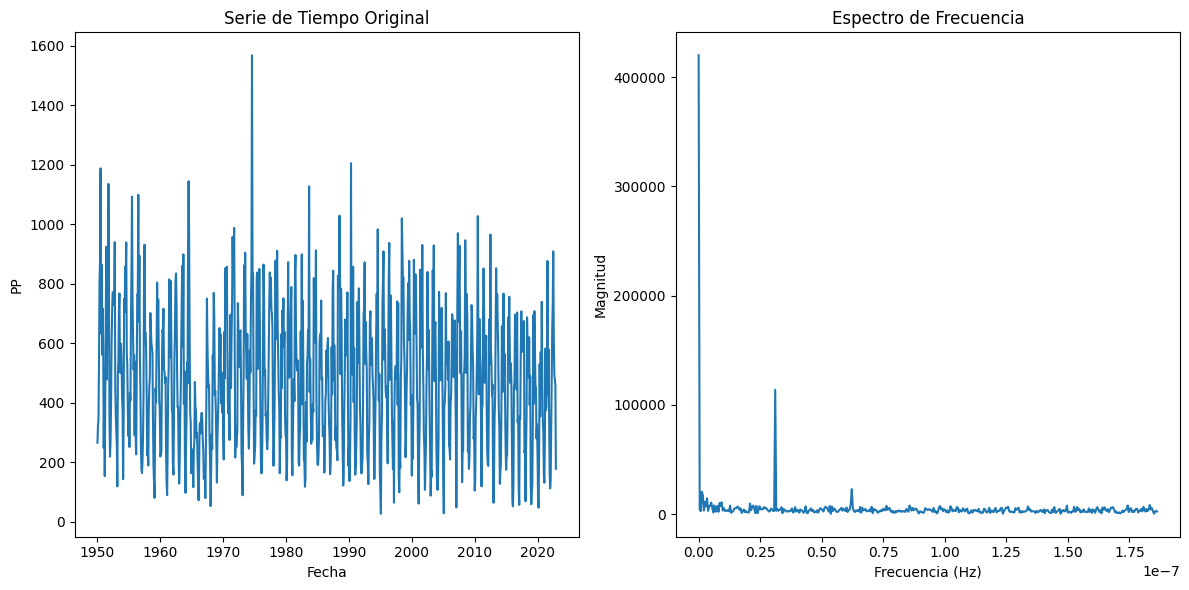

In [213]:
time_series = data['PP'].dropna()
time_index = data['Date'].dropna().reset_index(drop=True)
# Calcular la Transformada de Fourier
X = np.fft.fft(time_series)
N = len(X)
frequencies = np.fft.fftfreq(N, d=(time_index[1] - time_index[0]).total_seconds())  # Frecuencia de muestreo

# Obtener la magnitud del espectro
magnitude = np.abs(X)
magnitude = magnitude[:N // 2]  # Solo la mitad positiva del espectro
frequencies = frequencies[:N // 2]

# Graficar la serie de tiempo original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(time_index, time_series)
plt.title('Serie de Tiempo Original')
plt.xlabel('Fecha')
plt.ylabel('PP')

# Graficar el espectro de frecuencia
plt.subplot(1, 2, 2)
plt.plot(frequencies, magnitude)
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         876 non-null    datetime64[ns]
 1   Year         876 non-null    int64         
 2   Month        876 non-null    int32         
 3   PP           876 non-null    float64       
 4   Rolling_Avg  865 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 30.9 KB


In [230]:
!pip install pymannkendall

In [231]:
import pymannkendall as mk
data['Date'] = pd.to_datetime(data['Date'])
# Realizar el test de Mann-Kendall modificado
result = mk.original_test(data['PP'].dropna())


In [243]:
result

Mann_Kendall_Test(trend='decreasing', h=np.True_, p=np.float64(0.04454239372293811), z=np.float64(-2.0089504039766637), Tau=np.float64(-0.045343770384866276), s=np.float64(-17378.0), var_s=np.float64(74818874.66666667), slope=np.float64(-0.06517418447199504), intercept=np.float64(504.4637057064978))

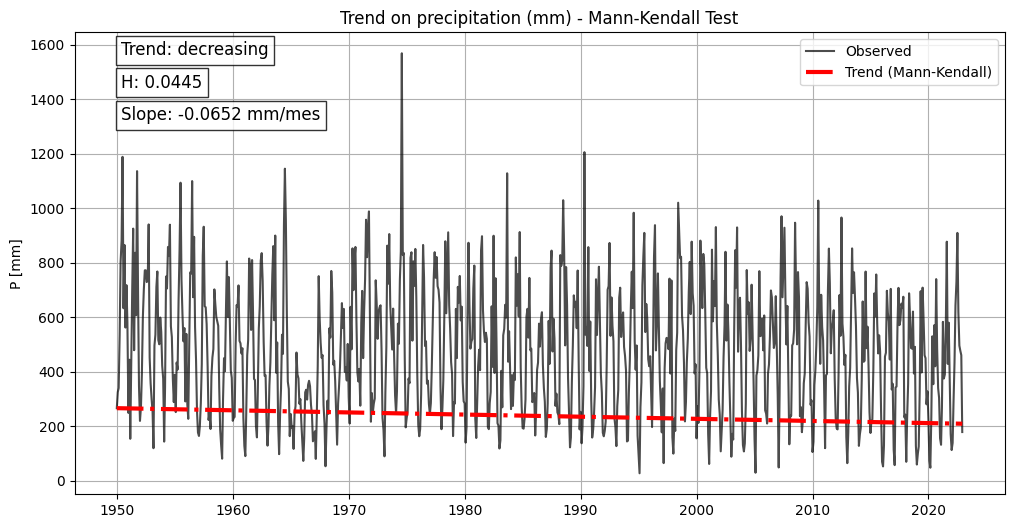

In [261]:
# Crear una columna con los valores de la tendencia
data['Trend'] = result.slope * (data.index - data.index[0]) + data['PP'].iloc[0]

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['PP'], label='Observed', color='black',alpha=0.7)
plt.plot(data['Date'], data['Trend'], label='Trend (Mann-Kendall)', color='red', linestyle='-.',linewidth=3)
plt.xlabel('')
plt.ylabel('P [mm]')
plt.title('Trend on precipitation (mm) - Mann-Kendall Test')
plt.legend()
plt.grid(True)

# Añadir anotaciones
plt.annotate(f'Trend: {result.trend}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', alpha=0.8))
plt.annotate(f'H: {result.p:.4f}', xy=(0.05, 0.88), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', alpha=0.8))
plt.annotate(f'Slope: {result.slope:.4f} mm/mes', xy=(0.05, 0.81), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', alpha=0.8))

plt.show()


In [262]:
# REGRESION LINEAL 
from sklearn.linear_model import LinearRegression

# Convertir fechas a números
data['Date_Ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Preparar las variables independientes y dependientes
X = data[['Date_Ordinal']]
y = data['PP']

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener las predicciones
data['Prediction'] = model.predict(X)

# Obtener parámetros del modelo
slope = model.coef_[0]
intercept = model.intercept_

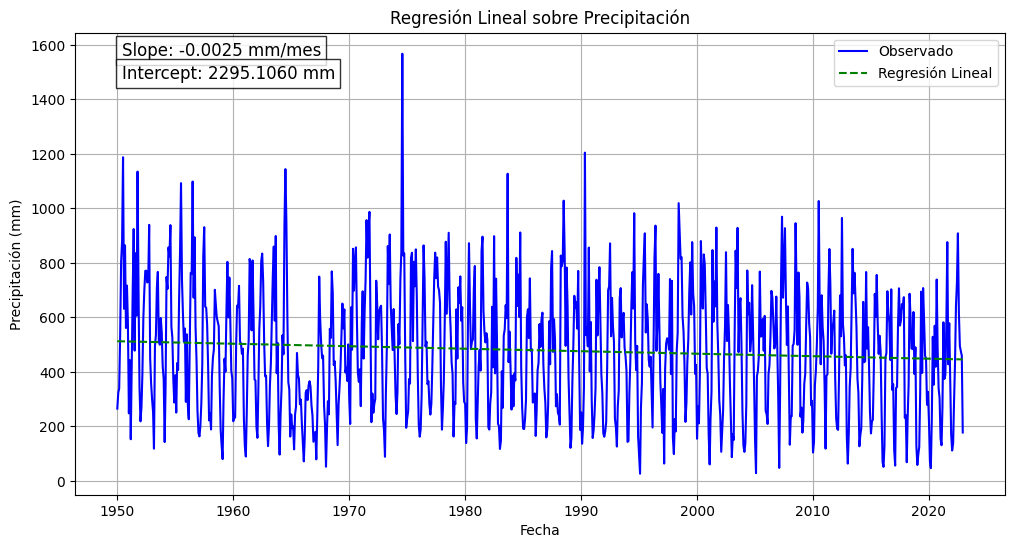

In [274]:
# REGRESION LINEAL 
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['PP'], label='Observado', color='blue')
plt.plot(data['Date'], data['Prediction'], label='Regresión Lineal', color='green', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.title('Regresión Lineal sobre Precipitación')
plt.legend()
plt.grid(True)

# Añadir anotaciones
plt.annotate(f'Slope: {slope:.4f} mm/mes', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', alpha=0.8))
plt.annotate(f'Intercept: {intercept:.4f} mm', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', alpha=0.8))

plt.show()

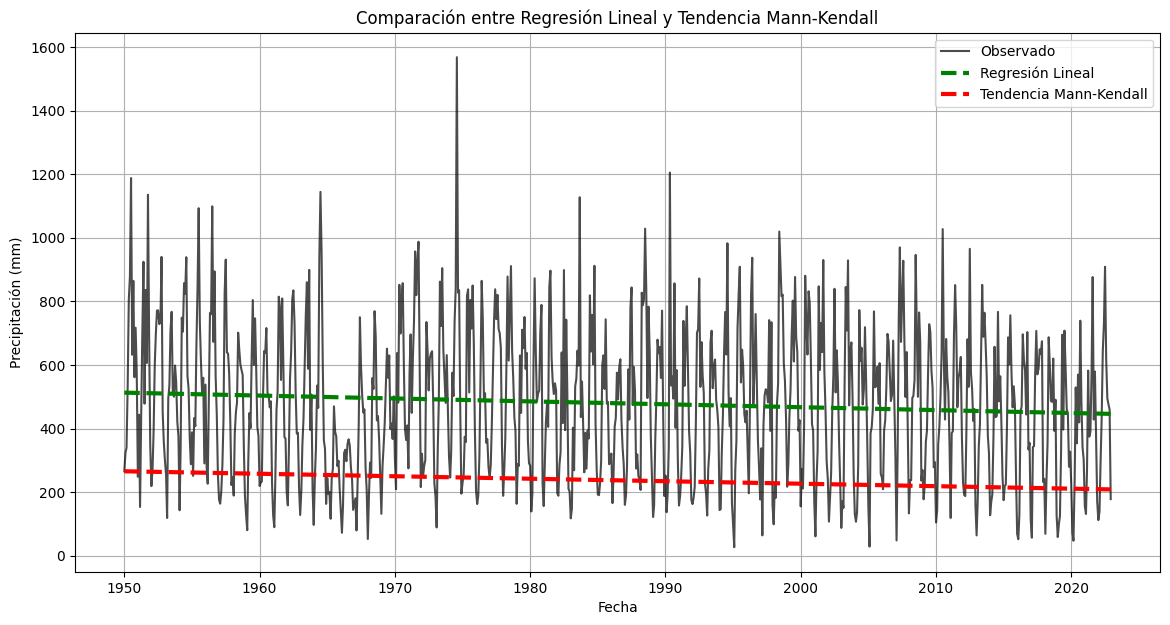

In [273]:
# Graficar
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['PP'], label='Observado', color='black',alpha=0.7)
plt.plot(data['Date'], data['Prediction'], label='Regresión Lineal', color='green', linestyle='--',linewidth=3)
plt.plot(data['Date'], data['Trend'], label='Tendencia Mann-Kendall', color='red', linestyle='--',linewidth=3)
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.title('Comparación entre Regresión Lineal y Tendencia Mann-Kendall')
plt.legend()
plt.grid(True)

plt.show()
